Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



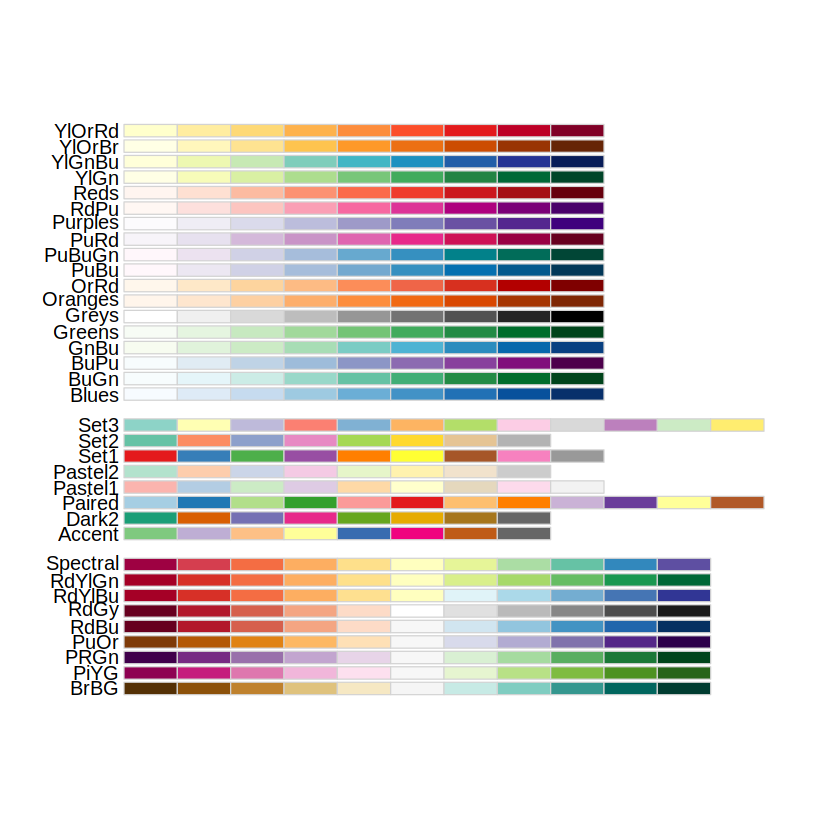

In [53]:
install.packages("janitor")
library(tidyverse)
library(repr)
library(readxl)
library(janitor)
library(RColorBrewer)
display.brewer.all()
options(repr.matrix.max.rows = 6)

In [54]:
url <- "https://raw.githubusercontent.com/ptank1/dsci-100-2023w1-group-30/main/Sleep_health_and_lifestyle_dataset.csv"
sleep_data <- read_csv(url)
head(sleep_data)

sleep_data


Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder
dbl (8): Person ID, Age, Sleep Duration, Quality of Sleep, Physical Activity...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [55]:
sleep_data <- sleep_data |> clean_names() 
sleep_data

person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [56]:
sleep_data_select <- sleep_data |>
separate(col = blood_pressure, into = c("systolic_blood_pressure", "diastolic_blood_pressure"), sep = "/") |>
select(person_id, gender, sleep_duration, quality_of_sleep, physical_activity_level) 



sleep_data_select

person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,Male,6.1,6,42
2,Male,6.2,6,60
3,Male,6.2,6,60
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,9,75
373,Female,8.1,9,75
374,Female,8.1,9,75


In [80]:
sleep_data_tidy <- sleep_data_select |>
mutate(quality_of_sleep = as.character(quality_of_sleep)) 

sleep_data_tidy

person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,Male,6.1,6,42
2,Male,6.2,6,60
3,Male,6.2,6,60
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,9,75
373,Female,8.1,9,75
374,Female,8.1,9,75


In [81]:
glimpse(sleep_data_tidy)

Rows: 374
Columns: 5
$ person_id               <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…
$ gender                  <chr> "Male", "Male", "Male", "Male", "Male", "Male"…
$ sleep_duration          <dbl> 6.1, 6.2, 6.2, 5.9, 5.9, 5.9, 6.3, 7.8, 7.8, 7…
$ quality_of_sleep        <chr> "6", "6", "6", "4", "4", "4", "6", "7", "7", "…
$ physical_activity_level <dbl> 42, 60, 60, 30, 30, 30, 40, 75, 75, 75, 30, 75…


In [82]:
sleep_data_tidy |> distinct(quality_of_sleep)

quality_of_sleep
<chr>
6
4
7
5
8
9


In [88]:
sleep_data_tidy <- sleep_data_tidy |>

  mutate(quality_of_sleep = as_factor(quality_of_sleep)) |>
  mutate(quality_of_sleep = fct_recode(quality_of_sleep, "Poor" = "4", "Poor" = "5", "Good" = "6", "Good" = "7", "Excellent" = "8", "Excellent" = "9"))



sleep_data_tidy

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quality_of_sleep = fct_recode(...)`.
Caused by warning:
! Unknown levels in `f`: 4, 5, 6, 7, 8, 9”


person_id,gender,sleep_duration,quality_of_sleep,physical_activity_level
<dbl>,<chr>,<dbl>,<fct>,<dbl>
1,Male,6.1,Good,42
2,Male,6.2,Good,60
3,Male,6.2,Good,60
⋮,⋮,⋮,⋮,⋮
372,Female,8.1,Excellent,75
373,Female,8.1,Excellent,75
374,Female,8.1,Excellent,75


In [89]:
sleep_data_tidy |> distinct(quality_of_sleep)

quality_of_sleep
<fct>
Good
Poor
Excellent


In [90]:
num_obs <- nrow(sleep_data_tidy)
sleep_data_tidy|>
  group_by(quality_of_sleep) |>
  summarize(
    count = n(),
    percentage = n() / num_obs * 100)

num_obs

quality_of_sleep,count,percentage
<fct>,<int>,<dbl>
Good,182,48.663102
Poor,12,3.208556
Excellent,180,48.128342


[1] 374

In [ ]:
sleep_duration_plot <- sleep_data_tidy |>
  ggplot(aes(x = average_quality_of_sleep, y = sleep_duration, color = sleep_disorder)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Sleep Quality (standardized)",
       y = " Sleep Duration in Hours (standardized)",
       color = "Sleep disorder") +
  theme(text = element_text(size = 12))
       
sleep_duration_plot

In [ ]:
physical_activity_plot <- sleep_data_tidy |>
  ggplot(aes(x = average_quality_of_sleep, y = physical_activity_level, color = average_quality_of_sleep)) +
  geom_point(alpha = 0.6) +
  labs(x = "Average Sleep Quality",
       y = "Physical Activity Level (mins/day)",
       color = "Sleep Quality") +
  theme(text = element_text(size = 12))
       
physical_activity_plot

In [ ]:
gender_plot <- sleep_data_tidy |>
  ggplot(aes(x = gender, fill = sleep_disorder)) +
  geom_bar(position = 'fill') +
  labs(x = "Gender",
       y = "Proportion of population with sleeping disorder",
       fill = "Sleep disorder") +
  theme(text = element_text(size = 12))
       
gender_plot